In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.plotting.backend = "plotly"

#import logging
# from pyspedas.cotrans.cotrans_get_coord import cotrans_get_coord
# from pyspedas.cotrans.cotrans import cotrans
# from pyspedas.cotrans.gsm2lmn import gsm2lmn
from pyspedas.mms import mec
#from pyspedas import tinterpol, omni
import os
import pyspedas
from pytplot import tplot, get_data, store_data, tlimit, options,tplot_names
from pyspedas.mms import fpi,fgm

In [18]:
MMS2_B = pd.read_csv('MMS2_B.csv',header = 0,names = ['times','Bx','By','Bz','Bmag','date'],
                     parse_dates=['date'])


MMS2_V = pd.read_csv('MMS2_V.csv',
                     header = 0,names = ['times','Vx','Vy','Vz','date'],
                     parse_dates=['date'])

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])

MMS2_Tperp = pd.read_csv('MMS2_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])



MMS3_B = pd.read_csv('MMS3_B.csv',header = 0,names = ['times','Bx','By','Bz','Bmag','date'],
                     parse_dates=['date'])


MMS3_V = pd.read_csv('MMS3_V.csv',
                     header = 0,names = ['times','Vx','Vy','Vz','date'],
                     parse_dates=['date'])

MMS3_n = pd.read_csv('MMS3_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])

MMS3_Tperp = pd.read_csv('MMS3_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS3_Tpara = pd.read_csv('MMS3_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])



MMS4_B = pd.read_csv('MMS4_B.csv',header = 0,names = ['times','Bx','By','Bz','Bmag','date'],
                     parse_dates=['date'])


MMS4_V = pd.read_csv('MMS4_V.csv',
                     header = 0,names = ['times','Vx','Vy','Vz','date'],
                     parse_dates=['date'])

MMS4_n = pd.read_csv('MMS4_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])

MMS4_Tperp = pd.read_csv('MMS4_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS4_Tpara = pd.read_csv('MMS4_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])

In [70]:
st_time = pd.to_datetime("2020-06-17/21:59:00")
end_time = pd.to_datetime("2020-06-17/22:05:00")

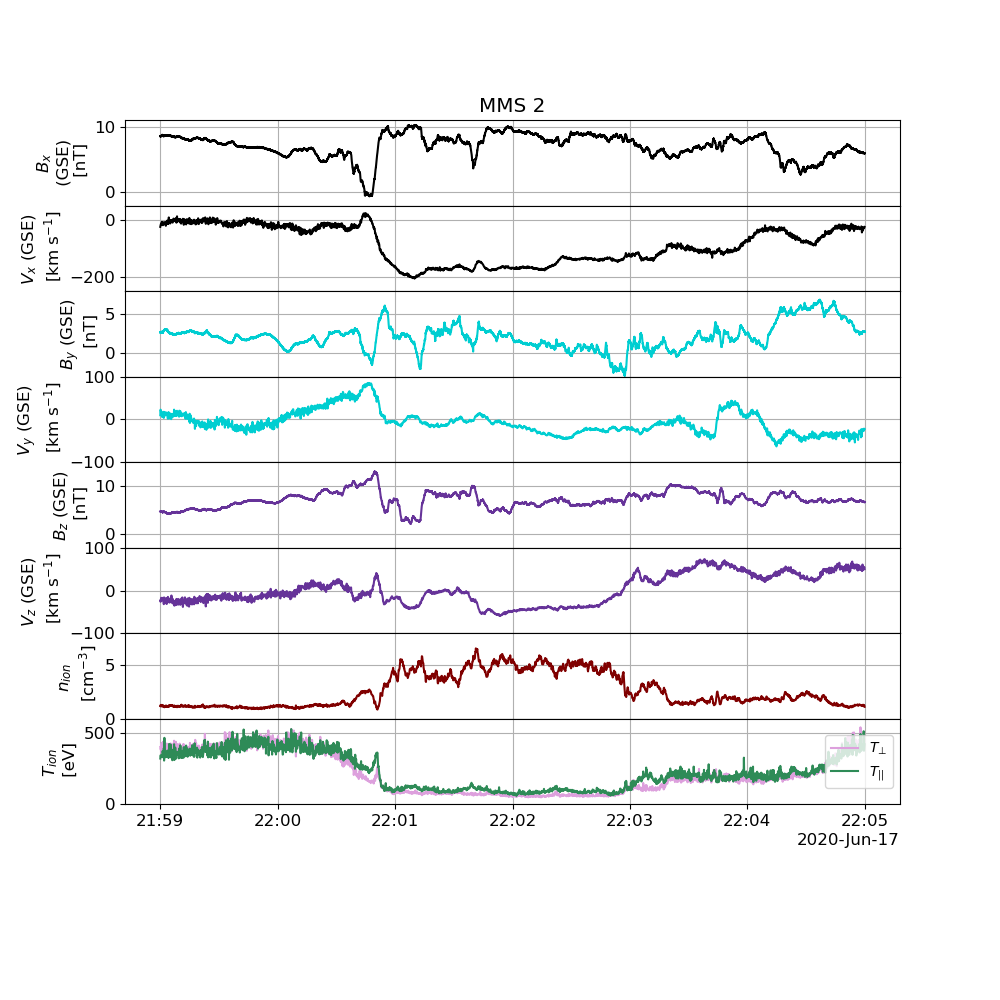

In [73]:
st_idx_B2 = MMS2_B.date.searchsorted(st_time)
end_idx_B2 = MMS2_B.date.searchsorted(end_time)


st_idx_FPI2 = MMS2_V.date.searchsorted(st_time)
end_idx_FPI2 = MMS2_V.date.searchsorted(end_time)





# Matplotlib plotting
%matplotlib widget


fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})


ax_MMS2_Bx = fig.add_subplot(911)
ax_MMS2_Bx.set_title('MMS 2')
ax_MMS2_Bx.plot(MMS2_B['date'][st_idx_B2:end_idx_B2],
                MMS2_B['Bx'][st_idx_B2:end_idx_B2], color ='black')
ax_MMS2_Bx.set_ylabel('$B_x$ \n (GSE) \n [nT]')
ax_MMS2_Bx.grid('on')



#Vx GSE
ax_MMS2_Vx = fig.add_subplot(912,sharex = ax_MMS2_Bx)
#ax_MMS2_Vx.set_title('Raw Data')
ax_MMS2_Vx.plot(MMS2_V['date'][st_idx_FPI2:end_idx_FPI2],
                MMS2_V['Vx'][st_idx_FPI2:end_idx_FPI2], color ='black')
ax_MMS2_Vx.set_ylabel('$V_x$ (GSE) \n [km s$^{-1}$]')
ax_MMS2_Vx.grid('on')





# By GSE
ax_MMS2_By = fig.add_subplot(913,sharex = ax_MMS2_Bx)
#ax_MMS2_By.plot(MMS2_B_trimmed['date'][st_idx_B2:end_idx_B2],MMS2_B_trimmed['By'][st_idx_B2:end_idx_B2], color ='darkturquoise')
ax_MMS2_By.plot(MMS2_B['date'][st_idx_B2:end_idx_B2],
                MMS2_B['By'][st_idx_B2:end_idx_B2], color ='darkturquoise')
ax_MMS2_By.set_ylabel('$B_y$ (GSE) \n [nT]')
ax_MMS2_By.grid('on')
#ax_MMS2_By.set_ylim([-50,50])

#Vy GSE
ax_MMS2_Vy = fig.add_subplot(914,sharex = ax_MMS2_Bx)
ax_MMS2_Vy.plot(MMS2_V['date'][st_idx_FPI2:end_idx_FPI2],
                MMS2_V['Vy'][st_idx_FPI2:end_idx_FPI2], color ='darkturquoise')
ax_MMS2_Vy.set_ylabel('$V_y$ (GSE) \n [km s$^{-1}$]')
ax_MMS2_Vy.grid('on')
#ax_MMS2_Vy.set_ylim([-50,50]



#Bz GSE
ax_MMS2_Bz = fig.add_subplot(915,sharex = ax_MMS2_Bx)
#ax_MMS2_Bz.plot(MMS2_B_trimmed['date'][st_idx_B2:end_idx_B2],MMS2_B_trimmed['Bz'][st_idx_B2:end_idx_B2], color ='rebeccapurple')
ax_MMS2_Bz.plot(MMS2_B['date'][st_idx_B2:end_idx_B2],
                MMS2_B['Bz'][st_idx_B2:end_idx_B2], color ='rebeccapurple')
ax_MMS2_Bz.set_ylabel('$B_z$ (GSE) \n [nT]')
ax_MMS2_Bz.grid('on')
#ax_MMS2_Bz.set_ylim([-50,50])




#Vz GSE
ax_MMS2_Vz = fig.add_subplot(916,sharex = ax_MMS2_Bx)
ax_MMS2_Vz.plot(MMS2_V['date'][st_idx_FPI2:end_idx_FPI2],
                MMS2_V['Vz'][st_idx_FPI2:end_idx_FPI2], color ='rebeccapurple')
ax_MMS2_Vz.set_ylabel('$V_z$ (GSE) \n [km s$^{-1}$]')
ax_MMS2_Vz.grid('on')

# ion density
ax_MMS2_n = fig.add_subplot(917,sharex = ax_MMS2_Bx)
ax_MMS2_n.plot(MMS2_n['date'][st_idx_FPI2:end_idx_FPI2],
               MMS2_n['n'][st_idx_FPI2:end_idx_FPI2],color = 'maroon')
ax_MMS2_n.set_ylabel('$n_{ion}$ \n [cm$^{-3}$]')
ax_MMS2_n.grid('on')
#ax_MMS2_n.set_xticklabels([])



# ion parallel and perpendicular temperature
ax_MMS2_T = fig.add_subplot(918,sharex = ax_MMS2_Bx)
ax_MMS2_T.plot(MMS2_Tperp['date'][st_idx_FPI2:end_idx_FPI2],
               MMS2_Tperp['Tperp'][st_idx_FPI2:end_idx_FPI2], label='$T_{⊥}$',color ='plum')
ax_MMS2_T.plot(MMS2_Tpara['date'][st_idx_FPI2:end_idx_FPI2],
               MMS2_Tpara['Tpara'][st_idx_FPI2:end_idx_FPI2], label='$T_{||}$',color ='seagreen')
ax_MMS2_T.set_ylabel('$T_{ion}$ \n [eV]')
ax_MMS2_T.grid('on')
ax_MMS2_T.legend(loc='center right',fontsize='small')


#Note some ylims are a little arbitrary; it's just as of 2024-04-05, setting 
# these limits produces best y-axis label placement when scrolled to fit the data

ax_MMS2_Bx.set_ylim([-2,11])
ax_MMS2_Vx.set_ylim([-250,50])
ax_MMS2_By.set_ylim([-3,8])
ax_MMS2_Vy.set_ylim([-100,100])    
ax_MMS2_Bz.set_ylim([-3,15])               
ax_MMS2_Vz.set_ylim([-100,100])
ax_MMS2_n.set_ylim([0,8])
ax_MMS2_T.set_ylim([0,600])

plt.subplots_adjust(hspace=0.0)
plt.show()

# plt.close()
#fig.savefig('Full_time_period_data')

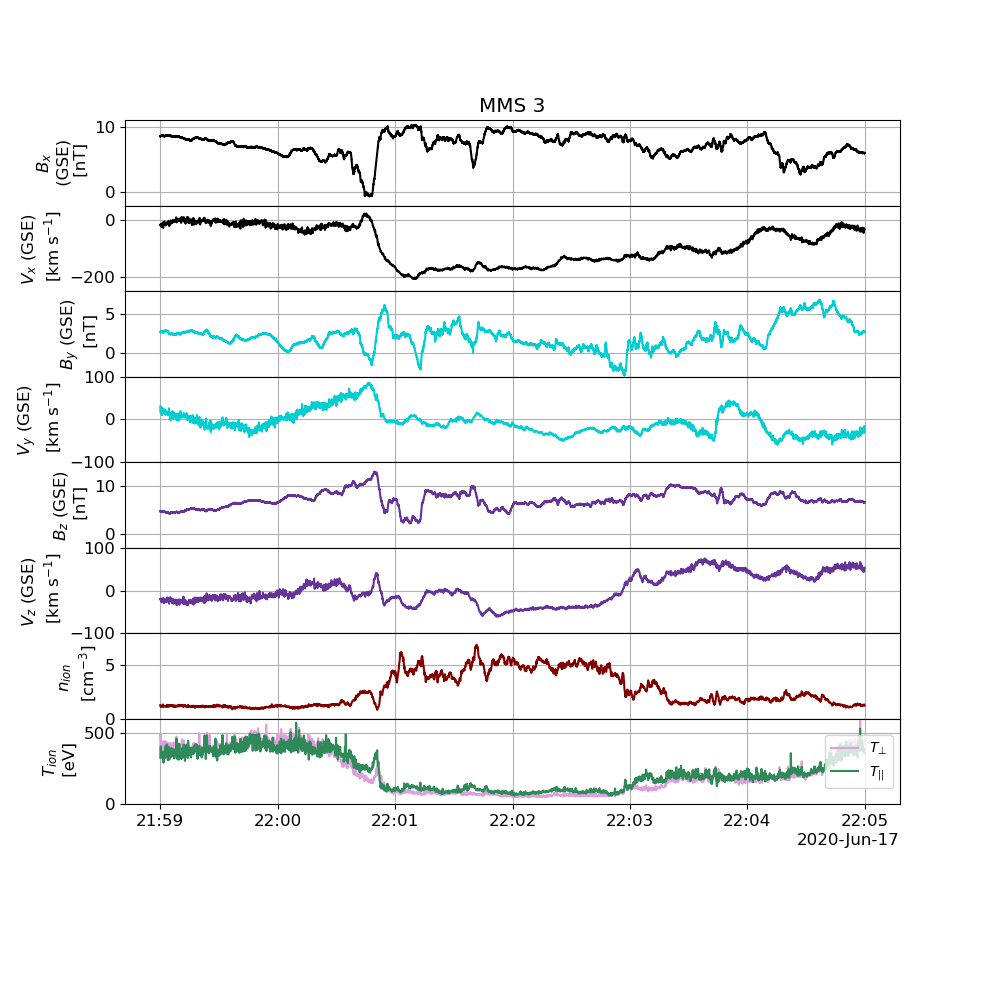

In [74]:
st_idx_B3 = MMS3_B.date.searchsorted(st_time)
end_idx_B3 = MMS3_B.date.searchsorted(end_time)


st_idx_FPI3 = MMS3_V.date.searchsorted(st_time)
end_idx_FPI3 = MMS3_V.date.searchsorted(end_time)





# Matplotlib plotting
%matplotlib widget


fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})


ax_MMS3_Bx = fig.add_subplot(911)
ax_MMS3_Bx.set_title('MMS 3')
ax_MMS3_Bx.plot(MMS3_B['date'][st_idx_B3:end_idx_B3],
                MMS3_B['Bx'][st_idx_B3:end_idx_B3], color ='black')
ax_MMS3_Bx.set_ylabel('$B_x$ \n (GSE) \n [nT]')
ax_MMS3_Bx.grid('on')



#Vx GSE
ax_MMS3_Vx = fig.add_subplot(912,sharex = ax_MMS3_Bx)
#ax_MMS3_Vx.set_title('Raw Data')
ax_MMS3_Vx.plot(MMS3_V['date'][st_idx_FPI3:end_idx_FPI3],
                MMS3_V['Vx'][st_idx_FPI3:end_idx_FPI3], color ='black')
ax_MMS3_Vx.set_ylabel('$V_x$ (GSE) \n [km s$^{-1}$]')
ax_MMS3_Vx.grid('on')





# By GSE
ax_MMS3_By = fig.add_subplot(913,sharex = ax_MMS3_Bx)
#ax_MMS3_By.plot(MMS3_B_trimmed['date'][st_idx_B3:end_idx_B3],MMS3_B_trimmed['By'][st_idx_B3:end_idx_B3], color ='darkturquoise')
ax_MMS3_By.plot(MMS3_B['date'][st_idx_B3:end_idx_B3],
                MMS3_B['By'][st_idx_B3:end_idx_B3], color ='darkturquoise')
ax_MMS3_By.set_ylabel('$B_y$ (GSE) \n [nT]')
ax_MMS3_By.grid('on')
#ax_MMS3_By.set_ylim([-50,50])

#Vy GSE
ax_MMS3_Vy = fig.add_subplot(914,sharex = ax_MMS3_Bx)
ax_MMS3_Vy.plot(MMS3_V['date'][st_idx_FPI3:end_idx_FPI3],
                MMS3_V['Vy'][st_idx_FPI3:end_idx_FPI3], color ='darkturquoise')
ax_MMS3_Vy.set_ylabel('$V_y$ (GSE) \n [km s$^{-1}$]')
ax_MMS3_Vy.grid('on')
#ax_MMS3_Vy.set_ylim([-50,50]



#Bz GSE
ax_MMS3_Bz = fig.add_subplot(915,sharex = ax_MMS3_Bx)
#ax_MMS3_Bz.plot(MMS3_B_trimmed['date'][st_idx_B3:end_idx_B3],MMS3_B_trimmed['Bz'][st_idx_B3:end_idx_B3], color ='rebeccapurple')
ax_MMS3_Bz.plot(MMS3_B['date'][st_idx_B3:end_idx_B3],
                MMS3_B['Bz'][st_idx_B3:end_idx_B3], color ='rebeccapurple')
ax_MMS3_Bz.set_ylabel('$B_z$ (GSE) \n [nT]')
ax_MMS3_Bz.grid('on')
#ax_MMS3_Bz.set_ylim([-50,50])




#Vz GSE
ax_MMS3_Vz = fig.add_subplot(916,sharex = ax_MMS3_Bx)
ax_MMS3_Vz.plot(MMS3_V['date'][st_idx_FPI3:end_idx_FPI3],
                MMS3_V['Vz'][st_idx_FPI3:end_idx_FPI3], color ='rebeccapurple')
ax_MMS3_Vz.set_ylabel('$V_z$ (GSE) \n [km s$^{-1}$]')
ax_MMS3_Vz.grid('on')

# ion density
ax_MMS3_n = fig.add_subplot(917,sharex = ax_MMS3_Bx)
ax_MMS3_n.plot(MMS3_n['date'][st_idx_FPI3:end_idx_FPI3],
               MMS3_n['n'][st_idx_FPI3:end_idx_FPI3],color = 'maroon')
ax_MMS3_n.set_ylabel('$n_{ion}$ \n [cm$^{-3}$]')
ax_MMS3_n.grid('on')
#ax_MMS3_n.set_xticklabels([])



# ion parallel and perpendicular temperature
ax_MMS3_T = fig.add_subplot(918,sharex = ax_MMS3_Bx)
ax_MMS3_T.plot(MMS3_Tperp['date'][st_idx_FPI3:end_idx_FPI3],
               MMS3_Tperp['Tperp'][st_idx_FPI3:end_idx_FPI3], label='$T_{⊥}$',color ='plum')
ax_MMS3_T.plot(MMS3_Tpara['date'][st_idx_FPI3:end_idx_FPI3],
               MMS3_Tpara['Tpara'][st_idx_FPI3:end_idx_FPI3], label='$T_{||}$',color ='seagreen')
ax_MMS3_T.set_ylabel('$T_{ion}$ \n [eV]')
ax_MMS3_T.grid('on')
ax_MMS3_T.legend(loc='center right',fontsize='small')


#Note some ylims are a little arbitrary; it's just as of 2024-04-05, setting 
# these limits produces best y-axis label placement when scrolled to fit the data

ax_MMS3_Bx.set_ylim([-2,11])
ax_MMS3_Vx.set_ylim([-250,50])
ax_MMS3_By.set_ylim([-3,8])
ax_MMS3_Vy.set_ylim([-100,100])    
ax_MMS3_Bz.set_ylim([-3,15])               
ax_MMS3_Vz.set_ylim([-100,100])
ax_MMS3_n.set_ylim([0,8])
ax_MMS3_T.set_ylim([0,600])

plt.subplots_adjust(hspace=0.0)

#plt.legend()
#plt.grid('on')

plt.show()
# plt.close()
#fig.savefig('Full_time_period_data')

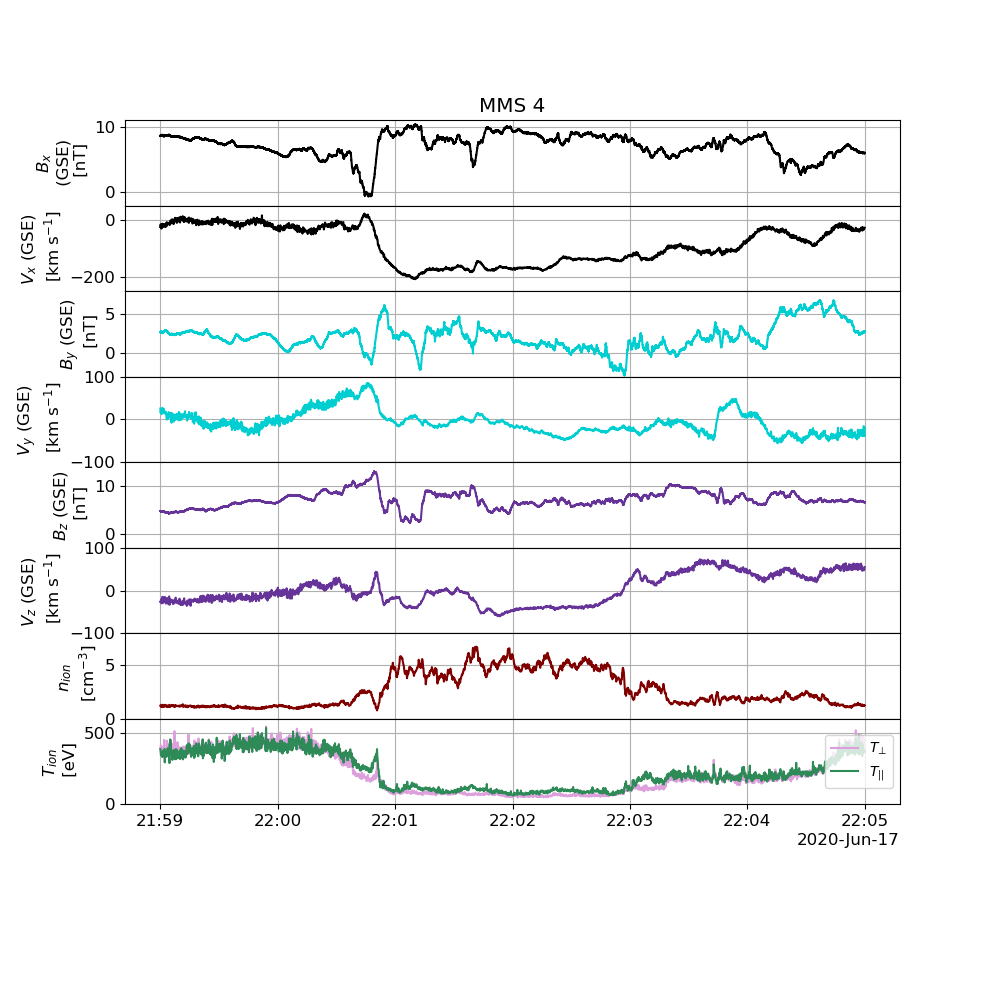

In [75]:
st_idx_B4 = MMS4_B.date.searchsorted(st_time)
end_idx_B4 = MMS4_B.date.searchsorted(end_time)


st_idx_FPI4 = MMS4_V.date.searchsorted(st_time)
end_idx_FPI4 = MMS4_V.date.searchsorted(end_time)





# Matplotlib plotting
%matplotlib widget


fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})


ax_MMS4_Bx = fig.add_subplot(911)
ax_MMS4_Bx.set_title('MMS 4')
ax_MMS4_Bx.plot(MMS4_B['date'][st_idx_B4:end_idx_B4],
                MMS4_B['Bx'][st_idx_B4:end_idx_B4], color ='black')
ax_MMS4_Bx.set_ylabel('$B_x$ \n (GSE) \n [nT]')
ax_MMS4_Bx.grid('on')



#Vx GSE
ax_MMS4_Vx = fig.add_subplot(912,sharex = ax_MMS4_Bx)
#ax_MMS4_Vx.set_title('Raw Data')
ax_MMS4_Vx.plot(MMS4_V['date'][st_idx_FPI4:end_idx_FPI4],
                MMS4_V['Vx'][st_idx_FPI4:end_idx_FPI4], color ='black')
ax_MMS4_Vx.set_ylabel('$V_x$ (GSE) \n [km s$^{-1}$]')
ax_MMS4_Vx.grid('on')





# By GSE
ax_MMS4_By = fig.add_subplot(913,sharex = ax_MMS4_Bx)
#ax_MMS4_By.plot(MMS4_B_trimmed['date'][st_idx_B4:end_idx_B4],MMS4_B_trimmed['By'][st_idx_B4:end_idx_B4], color ='darkturquoise')
ax_MMS4_By.plot(MMS4_B['date'][st_idx_B4:end_idx_B4],
                MMS4_B['By'][st_idx_B4:end_idx_B4], color ='darkturquoise')
ax_MMS4_By.set_ylabel('$B_y$ (GSE) \n [nT]')
ax_MMS4_By.grid('on')
#ax_MMS4_By.set_ylim([-50,50])

#Vy GSE
ax_MMS4_Vy = fig.add_subplot(914,sharex = ax_MMS4_Bx)
ax_MMS4_Vy.plot(MMS4_V['date'][st_idx_FPI4:end_idx_FPI4],
                MMS4_V['Vy'][st_idx_FPI4:end_idx_FPI4], color ='darkturquoise')
ax_MMS4_Vy.set_ylabel('$V_y$ (GSE) \n [km s$^{-1}$]')
ax_MMS4_Vy.grid('on')
#ax_MMS4_Vy.set_ylim([-50,50]



#Bz GSE
ax_MMS4_Bz = fig.add_subplot(915,sharex = ax_MMS4_Bx)
#ax_MMS4_Bz.plot(MMS4_B_trimmed['date'][st_idx_B4:end_idx_B4],MMS4_B_trimmed['Bz'][st_idx_B4:end_idx_B4], color ='rebeccapurple')
ax_MMS4_Bz.plot(MMS4_B['date'][st_idx_B4:end_idx_B4],
                MMS4_B['Bz'][st_idx_B4:end_idx_B4], color ='rebeccapurple')
ax_MMS4_Bz.set_ylabel('$B_z$ (GSE) \n [nT]')
ax_MMS4_Bz.grid('on')
#ax_MMS4_Bz.set_ylim([-50,50])




#Vz GSE
ax_MMS4_Vz = fig.add_subplot(916,sharex = ax_MMS4_Bx)
ax_MMS4_Vz.plot(MMS4_V['date'][st_idx_FPI4:end_idx_FPI4],
                MMS4_V['Vz'][st_idx_FPI4:end_idx_FPI4], color ='rebeccapurple')
ax_MMS4_Vz.set_ylabel('$V_z$ (GSE) \n [km s$^{-1}$]')
ax_MMS4_Vz.grid('on')

# ion density
ax_MMS4_n = fig.add_subplot(917,sharex = ax_MMS4_Bx)
ax_MMS4_n.plot(MMS4_n['date'][st_idx_FPI4:end_idx_FPI4],
               MMS4_n['n'][st_idx_FPI4:end_idx_FPI4],color = 'maroon')
ax_MMS4_n.set_ylabel('$n_{ion}$ \n [cm$^{-3}$]')
ax_MMS4_n.grid('on')
#ax_MMS4_n.set_xticklabels([])



# ion parallel and perpendicular temperature
ax_MMS4_T = fig.add_subplot(918,sharex = ax_MMS4_Bx)
ax_MMS4_T.plot(MMS4_Tperp['date'][st_idx_FPI4:end_idx_FPI4],
               MMS4_Tperp['Tperp'][st_idx_FPI4:end_idx_FPI4], label='$T_{⊥}$',color ='plum')
ax_MMS4_T.plot(MMS4_Tpara['date'][st_idx_FPI4:end_idx_FPI4],
               MMS4_Tpara['Tpara'][st_idx_FPI4:end_idx_FPI4], label='$T_{||}$',color ='seagreen')
ax_MMS4_T.set_ylabel('$T_{ion}$ \n [eV]')
ax_MMS4_T.grid('on')
ax_MMS4_T.legend(loc='center right',fontsize='small')


#Note some ylims are a little arbitrary; it's just as of 2024-04-05, setting 
# these limits produces best y-axis label placement when scrolled to fit the data

ax_MMS4_Bx.set_ylim([-2,11])
ax_MMS4_Vx.set_ylim([-250,50])
ax_MMS4_By.set_ylim([-3,8])
ax_MMS4_Vy.set_ylim([-100,100])    
ax_MMS4_Bz.set_ylim([-3,15])               
ax_MMS4_Vz.set_ylim([-100,100])
ax_MMS4_n.set_ylim([0,8])
ax_MMS4_T.set_ylim([0,600])




plt.subplots_adjust(hspace=0.0)

#plt.legend()
#plt.grid('on')

plt.show()
# plt.close()
#fig.savefig('Full_time_period_data')

In [13]:

# ax_IMF = fig.add_subplot(918,sharex = ax_Bx)
# ax_IMF.plot(OMNI_IMF['date'],OMNI_IMF['IMF'], label='IMF',color ='darkgray')
# #ax_IMF.plot(OMNI_flow_['date'],OMNI_IMF['IMF'], label='$T_{||}$',color ='seagreen')
# ax_IMF.set_ylabel('IMF ')
# ax_IMF.grid('on')
# #x_IMF.legend(loc='center right',fontsize='small')




# #ax1.set_xticks([])
# plt.grid('on')
# plt.legend()
# ax2 = fig.add_subplot(512)
# ax2.plot(MMS2_n['date'],MMS2_n['n'], label='$n$')
# ax2.set_ylabel('n \n [cm$^{-3}$]')
# ax2.grid('on')
# #ax2.set_xticks([])
# #plt.grid('on')
# ax3 = fig.add_subplot(513)
# ax3.plot(MMS2_Tpara['date'],MMS2_Tpara['Tpara'], label='$T_{||}$')
# ax3.set_ylabel('$T_{||}$ \n [eV]')
# ax3.grid('on')
# #ax3.set_xticks([])
# #plt.grid('on')
# ax4 = fig.add_subplot(514)
# ax4.plot(MMS2_Tperp['date'],MMS2_Tperp['Tperp'], label='$T_{⊥}$')
# ax4.set_ylabel('$T_{⊥}$ \n [eV]')
# ax4.grid('on')
# #ax4.set_xticks([])
# #plt.grid('on')
# ax5 = fig.add_subplot(515)
# ax5.plot(MMS2_V['date'],MMS2_V['Vx'], label='$V_x$')
# ax5.plot(MMS2_V['date'],MMS2_V['Vy'], label='$V_y$')
# ax5.plot(MMS2_V['date'],MMS2_V['Vz'], label='$V_z$')
# ax5.set_ylabel('$V}$ \n [km s$^{-1}$]')
# ax5.grid('on')


In [14]:
MMS4_B

,times,Bx,By,Bz,Bmag,date
0,1.592426e+09,6.828599,2.095730,7.978180,10.708557,2020-06-17 20:29:23.933625088
1,1.592426e+09,6.801977,2.102870,7.982025,10.695871,2020-06-17 20:29:23.941437952
2,1.592426e+09,6.812806,2.094843,7.996930,10.712311,2020-06-17 20:29:23.949250048
3,1.592426e+09,6.795302,2.110724,7.994455,10.702458,2020-06-17 20:29:23.957062912
4,1.592426e+09,6.799210,2.094457,7.980344,10.691206,2020-06-17 20:29:23.964876032
...,...,...,...,...,...,...
2308731,1.592444e+09,2.196524,3.012807,8.763008,9.523237,2020-06-18 01:30:02.120674048
2308732,1.592444e+09,2.205606,3.068694,8.746009,9.527552,2020-06-18 01:30:02.128486912
2308733,1.592444e+09,2.170545,3.059431,8.724763,9.496993,2020-06-18 01:30:02.136299008
2308734,1.592444e+09,2.157619,3.042399,8.720475,9.484630,2020-06-18 01:30:02.144112128


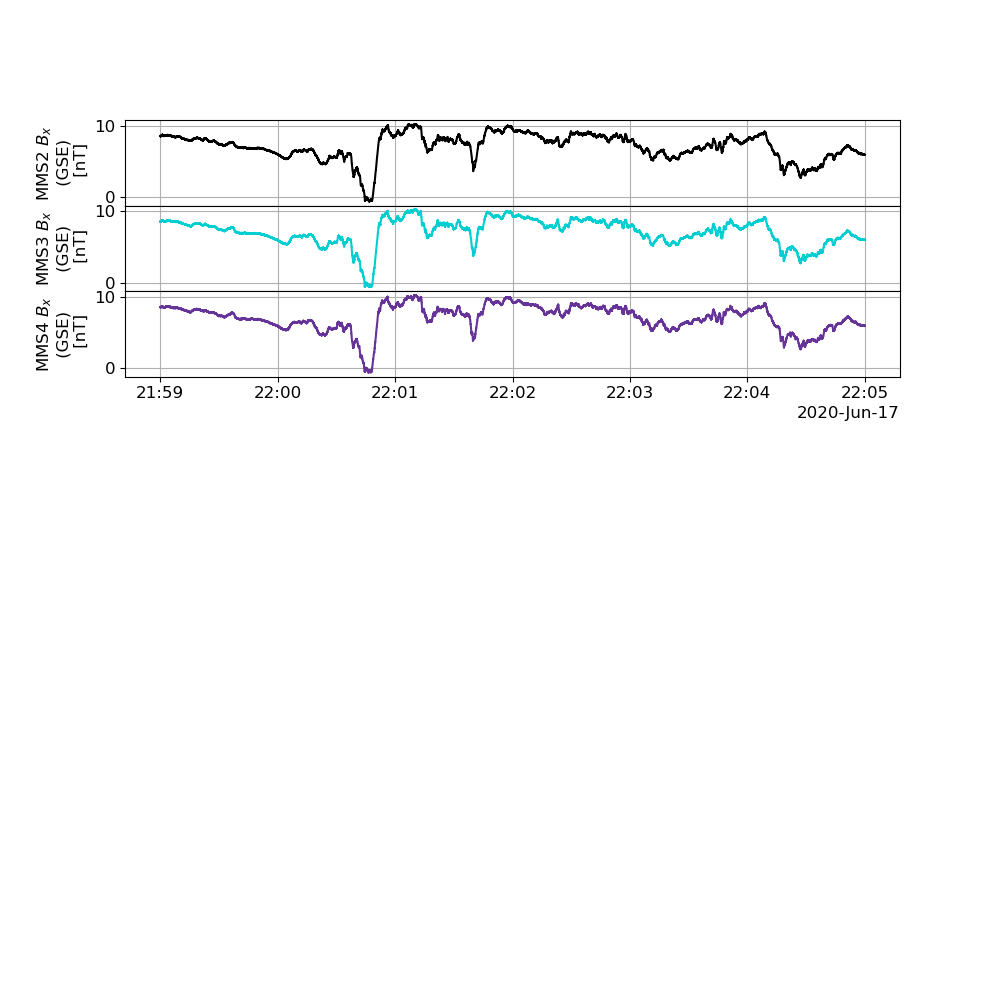

In [16]:






# MMS2_B2 = pd.read_csv('MMS2_B.csv',header = 0,names = ['times','Bx','By','Bz','date'],
#                          parse_dates=['date'])


st_idx_B2 = MMS2_B.date.searchsorted(st_time)
end_idx_B2 = MMS2_B.date.searchsorted(end_time)


st_idx_FPI2 = MMS2_V.date.searchsorted(st_time)
end_idx_FPI2 = MMS2_V.date.searchsorted(end_time)


st_idx_B3 = MMS3_B.date.searchsorted(st_time)
end_idx_B3 = MMS3_B.date.searchsorted(end_time)


st_idx_FPI3 = MMS3_V.date.searchsorted(st_time)
end_idx_FPI3 = MMS3_V.date.searchsorted(end_time)


st_idx_B4 = MMS4_B.date.searchsorted(st_time)
end_idx_B4 = MMS4_B.date.searchsorted(end_time)


st_idx_FPI4 = MMS4_V.date.searchsorted(st_time)
end_idx_FPI4 = MMS4_V.date.searchsorted(end_time)



fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})




ax_Bx_MMS2 = fig.add_subplot(911)
#ax_Bx_MMS2.set_title('MMS 4')
#ax_Bx_MMS2.plot(MMS4_B_trimmed['date'],MMS4_B_trimmed['Bx'], label='$B_x$', color ='black')
ax_Bx_MMS2.plot(MMS2_B['date'][st_idx_B2:end_idx_B2],MMS2_B['Bx'][st_idx_B2:end_idx_B2], color ='black')
ax_Bx_MMS2.set_ylabel('MMS2 $B_x$ \n (GSE) \n [nT]')
ax_Bx_MMS2.grid('on')



ax_Bx_MMS3 = fig.add_subplot(912,sharex = ax_Bx_MMS2)
ax_Bx_MMS3.plot(MMS3_B['date'][st_idx_B3:end_idx_B3],MMS3_B['Bx'][st_idx_B3:end_idx_B3], color ='darkturquoise')
ax_Bx_MMS3.set_ylabel('MMS3 $B_x$ \n (GSE) \n [nT]')
ax_Bx_MMS3.grid('on')




#Bz GSE
ax_Bx_MMS4 = fig.add_subplot(913,sharex = ax_Bx_MMS2)
#ax_Bx_MMS4.plot(MMS4_B_trimmed['date'],MMS4_B_trimmed['Bz'], label='$B_z$', color ='rebeccapurple')
ax_Bx_MMS4.plot(MMS4_B['date'][st_idx_B4:end_idx_B4],MMS4_B['Bx'][st_idx_B4:end_idx_B4], color ='rebeccapurple')
ax_Bx_MMS4.set_ylabel('MMS4 $B_x$\n (GSE) \n [nT]')
ax_Bx_MMS4.grid('on')

plt.subplots_adjust(hspace=0.0)

plt.show()